In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import backend as k

In [2]:
data=pd.read_csv('final_processed.csv')
data

,Unnamed: 0,userId,gender,sport,id,longitude,latitude,altitude,timestamp,time_elapsed,heart_rate,derived_speed,distance,tar_heart_rate,tar_derived_speed,since_begin,since_last
0,0,10921915,male,bike,396826535,24.649770,60.173349,-1.804467,1408898746,-0.122568,-8.197369,-7.082944,-4.372304,100.000000,7.105427e-15,1.378479e+06,2158.846078
1,1,10921915,male,bike,396826535,24.650143,60.173240,-1.818636,1408898754,-0.122122,-5.369012,-2.088780,-1.797320,113.355469,1.255489e+01,1.378479e+06,2158.846078
2,2,10921915,male,bike,396826535,24.650911,60.172980,-1.820717,1408898765,-0.121676,-3.916386,-0.351569,-0.055967,120.214752,1.692208e+01,1.378479e+06,2158.846078
3,3,10921915,male,bike,396826535,24.650669,60.172478,-1.847772,1408898778,-0.121230,-4.150721,-0.680039,-0.051062,119.108221,1.609634e+01,1.378479e+06,2158.846078
4,4,10921915,male,bike,396826535,24.649145,60.171861,-1.851729,1408898794,-0.120784,-3.841288,-0.279256,4.282176,120.569362,1.710387e+01,1.378479e+06,2158.846078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30897595,30897595,69,male,bike,596955589,11.771525,55.244205,-2.234575,1320187545,0.008938,-9.265715,-5.270313,-3.923857,94.955283,4.556796e+00,-1.480505e+01,-0.011580
30897596,30897596,69,male,bike,596955589,11.771511,55.244205,-2.236174,1320187548,0.009383,-9.286278,-5.250881,-3.912920,94.858186,4.605646e+00,-1.480505e+01,-0.011580
30897597,30897597,69,male,bike,596955589,11.771461,55.244217,-2.237819,1320187552,0.009829,-9.259218,-5.318247,-3.938114,94.985964,4.436295e+00,-1.480505e+01,-0.011580
30897598,30897598,69,male,bike,596955589,11.771368,55.244228,-2.241828,1320187556,0.010275,-9.468020,-5.083516,-3.905412,94.000000,5.026387e+00,-1.480505e+01,-0.011580


In [3]:
data.describe()

,Unnamed: 0,userId,id,longitude,latitude,altitude,timestamp,time_elapsed,heart_rate,derived_speed,distance,tar_heart_rate,tar_derived_speed,since_begin,since_last
count,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07,3.089760e+07
mean,1.544880e+07,4.581047e+06,3.645500e+08,1.165609e+01,4.277707e+01,-9.621740e-02,1.398707e+09,-5.592344e-02,-3.683366e-01,-3.843169e-01,4.250600e+00,1.369686e+02,1.683976e+01,-1.420581e+00,9.381144e-03
std,8.919369e+06,3.877977e+06,1.598918e+08,4.954340e+01,2.009642e+01,4.635084e+00,3.392614e+07,3.860546e-02,4.602324e+00,1.952560e+02,4.696540e+02,2.173212e+01,4.908565e+02,4.295374e+03,6.726980e+00
min,0.000000e+00,6.900000e+01,2.579360e+05,-1.600009e+02,-5.149342e+01,-5.050843e+02,1.170119e+09,-1.225675e-01,-1.878613e+01,-7.636031e+03,-4.727050e+03,5.000000e+01,-1.917850e+04,-1.480505e+01,-1.158027e-02
25%,7.724400e+06,1.520156e+06,2.599629e+08,-3.608460e-01,3.947421e+01,-2.163103e+00,1.378562e+09,-8.924548e-02,-3.117461e+00,-3.076244e+00,-2.346531e+00,1.239873e+02,1.007249e+01,-1.480505e+01,-1.158027e-02
50%,1.544880e+07,3.381703e+06,3.597589e+08,1.089222e+01,5.016756e+01,-1.544809e+00,1.401550e+09,-5.592344e-02,7.840944e-02,-1.469524e+00,-4.721074e-01,1.390781e+02,1.411164e+01,-1.480505e+01,-1.158027e-02
75%,2.317320e+07,7.038373e+06,4.859358e+08,1.983358e+01,5.561294e+01,1.674268e-01,1.425227e+09,-2.260139e-02,2.815756e+00,3.403575e+00,3.878029e+00,1.520038e+02,2.636218e+01,-1.480505e+01,-1.158027e-02
max,3.089760e+07,1.548142e+07,6.740080e+08,1.773666e+02,6.968066e+01,1.422245e+02,1.554627e+09,1.072066e-02,1.298015e+01,1.895148e+05,3.544274e+05,2.000000e+02,4.764413e+05,1.378479e+06,2.158846e+03


In [4]:
user_count=data['userId'].value_counts()
user_count

userId
2734298     275100
9051351     272400
4535678     232500
1063624     224700
2486861     203700
             ...  
10198429       300
3303712        300
4045488        300
1541269        300
1609921        300
Name: count, Length: 1038, dtype: int64

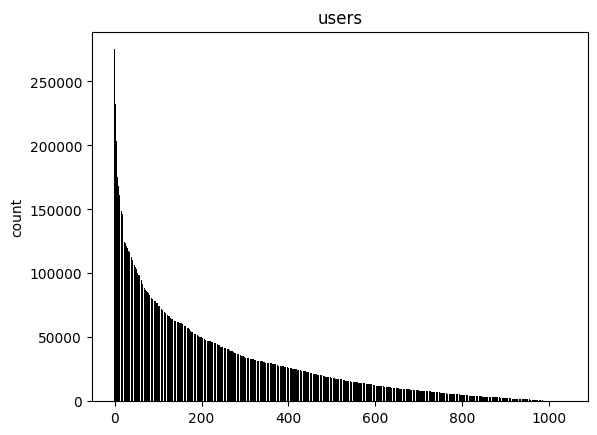

In [5]:
fig,ax=plt.subplots()
counts=user_count.values
users=list(range(len(counts)))
ax.bar(users, counts,color='black')
ax.set_ylabel('count')
ax.set_title('users')
plt.show()

In [6]:
user_count=user_count.loc[user_count>user_count.quantile(0.9)]
user_count

userId
2734298    275100
9051351    272400
4535678    232500
1063624    224700
2486861    203700
            ...  
3327597     76500
9313150     74400
13653       74100
4584909     74100
8875079     74100
Name: count, Length: 104, dtype: int64

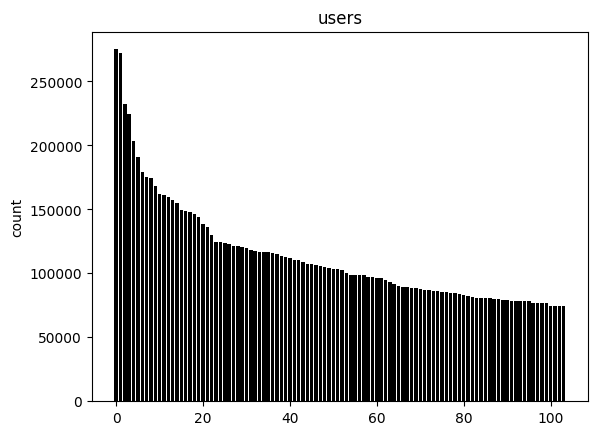

In [7]:
fig,ax=plt.subplots()
counts=user_count.values
users=list(range(len(counts)))
ax.bar(users, counts,color='black')
ax.set_ylabel('count')
ax.set_title('users')
plt.show()

In [8]:
data.drop(index=user_count.keys(),inplace=True)
data

,Unnamed: 0,userId,gender,sport,id,longitude,latitude,altitude,timestamp,time_elapsed,heart_rate,derived_speed,distance,tar_heart_rate,tar_derived_speed,since_begin,since_last
0,0,10921915,male,bike,396826535,24.649770,60.173349,-1.804467,1408898746,-0.122568,-8.197369,-7.082944,-4.372304,100.000000,7.105427e-15,1.378479e+06,2158.846078
1,1,10921915,male,bike,396826535,24.650143,60.173240,-1.818636,1408898754,-0.122122,-5.369012,-2.088780,-1.797320,113.355469,1.255489e+01,1.378479e+06,2158.846078
2,2,10921915,male,bike,396826535,24.650911,60.172980,-1.820717,1408898765,-0.121676,-3.916386,-0.351569,-0.055967,120.214752,1.692208e+01,1.378479e+06,2158.846078
3,3,10921915,male,bike,396826535,24.650669,60.172478,-1.847772,1408898778,-0.121230,-4.150721,-0.680039,-0.051062,119.108221,1.609634e+01,1.378479e+06,2158.846078
4,4,10921915,male,bike,396826535,24.649145,60.171861,-1.851729,1408898794,-0.120784,-3.841288,-0.279256,4.282176,120.569362,1.710387e+01,1.378479e+06,2158.846078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30897595,30897595,69,male,bike,596955589,11.771525,55.244205,-2.234575,1320187545,0.008938,-9.265715,-5.270313,-3.923857,94.955283,4.556796e+00,-1.480505e+01,-0.011580
30897596,30897596,69,male,bike,596955589,11.771511,55.244205,-2.236174,1320187548,0.009383,-9.286278,-5.250881,-3.912920,94.858186,4.605646e+00,-1.480505e+01,-0.011580
30897597,30897597,69,male,bike,596955589,11.771461,55.244217,-2.237819,1320187552,0.009829,-9.259218,-5.318247,-3.938114,94.985964,4.436295e+00,-1.480505e+01,-0.011580
30897598,30897598,69,male,bike,596955589,11.771368,55.244228,-2.241828,1320187556,0.010275,-9.468020,-5.083516,-3.905412,94.000000,5.026387e+00,-1.480505e+01,-0.011580


In [9]:
onehot=OneHotEncoder(sparse_output=False,min_frequency=0.05,handle_unknown='infrequent_if_exist')
onehotdata=onehot.fit_transform(data[['gender','sport']])

In [10]:
onehotdata=pd.DataFrame(data=onehotdata,index=data.index,columns=onehot.get_feature_names_out())
onehotdata

,gender_female,gender_male,gender_infrequent_sklearn,sport_bike,sport_mountain bike,sport_run,sport_infrequent_sklearn
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
30897595,0.0,1.0,0.0,1.0,0.0,0.0,0.0
30897596,0.0,1.0,0.0,1.0,0.0,0.0,0.0
30897597,0.0,1.0,0.0,1.0,0.0,0.0,0.0
30897598,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [11]:
data=data.join(onehotdata)

In [12]:
data.drop(columns=['Unnamed: 0','userId','id','gender','sport','heart_rate','derived_speed','timestamp'],inplace=True)
data

,longitude,latitude,altitude,time_elapsed,distance,tar_heart_rate,tar_derived_speed,since_begin,since_last,gender_female,gender_male,gender_infrequent_sklearn,sport_bike,sport_mountain bike,sport_run,sport_infrequent_sklearn
0,24.649770,60.173349,-1.804467,-0.122568,-4.372304,100.000000,7.105427e-15,1.378479e+06,2158.846078,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,24.650143,60.173240,-1.818636,-0.122122,-1.797320,113.355469,1.255489e+01,1.378479e+06,2158.846078,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,24.650911,60.172980,-1.820717,-0.121676,-0.055967,120.214752,1.692208e+01,1.378479e+06,2158.846078,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,24.650669,60.172478,-1.847772,-0.121230,-0.051062,119.108221,1.609634e+01,1.378479e+06,2158.846078,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,24.649145,60.171861,-1.851729,-0.120784,4.282176,120.569362,1.710387e+01,1.378479e+06,2158.846078,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30897595,11.771525,55.244205,-2.234575,0.008938,-3.923857,94.955283,4.556796e+00,-1.480505e+01,-0.011580,0.0,1.0,0.0,1.0,0.0,0.0,0.0
30897596,11.771511,55.244205,-2.236174,0.009383,-3.912920,94.858186,4.605646e+00,-1.480505e+01,-0.011580,0.0,1.0,0.0,1.0,0.0,0.0,0.0
30897597,11.771461,55.244217,-2.237819,0.009829,-3.938114,94.985964,4.436295e+00,-1.480505e+01,-0.011580,0.0,1.0,0.0,1.0,0.0,0.0,0.0
30897598,11.771368,55.244228,-2.241828,0.010275,-3.905412,94.000000,5.026387e+00,-1.480505e+01,-0.011580,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [13]:
feature_data=data.drop(columns=['tar_heart_rate','tar_derived_speed'])
target_data=data[['tar_heart_rate','tar_derived_speed']]

In [14]:
feature_train,feature_test,target_train,target_test=train_test_split(feature_data,target_data,random_state=0)

In [15]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(100,input_shape=(14,)),\
                                  tf.keras.layers.Dropout(0.05),\
                                  tf.keras.layers.Dense(100),\
                                  tf.keras.layers.Dropout(0.05),\
                                  tf.keras.layers.Dense(2)])

def rmse(actual,predicted):
    return k.sqrt(k.mean(k.square(predicted-actual)))

model.compile(optimizer='adam',loss=rmse,metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(feature_train,target_train,epochs=5)



Epoch 1/5

724161/724161 [==============================] - 682s 939us/step - loss: 47.9763 - root_mean_squared_error: 3362.4990
Epoch 2/5
724161/724161 [==============================] - 693s 957us/step - loss: 34.2546 - root_mean_squared_error: 775.5825
Epoch 3/5
724161/724161 [==============================] - 703s 971us/step - loss: 34.4752 - root_mean_squared_error: 793.8097
Epoch 4/5
724161/724161 [==============================] - 712s 983us/step - loss: 33.9850 - root_mean_squared_error: 767.4058
Epoch 5/5
724161/724161 [==============================] - 724s 999us/step - loss: 34.3111 - root_mean_squared_error: 822.1129


In [16]:
model.evaluate(feature_test,target_test)

241387/241387 [==============================] - 154s 636us/step - loss: 41.6028 - root_mean_squared_error: 1124.8096


[41.60284423828125, 1124.8095703125]